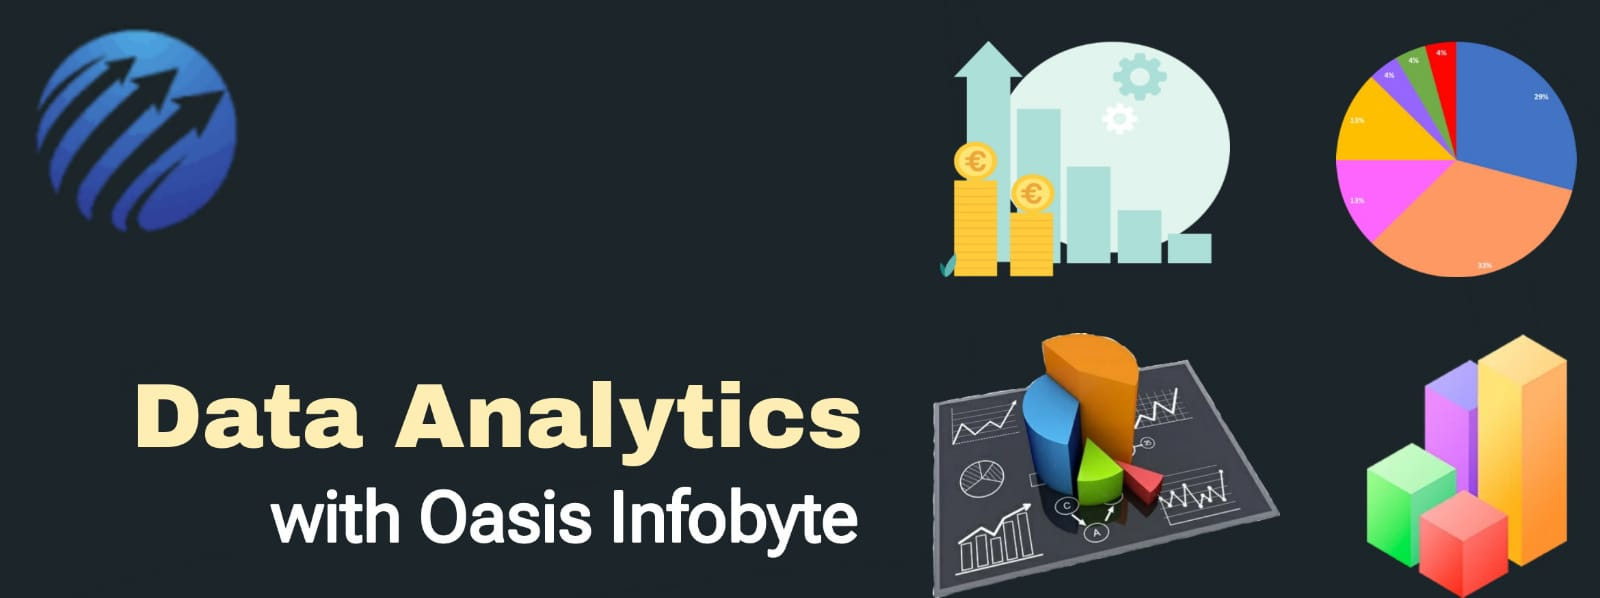

# Oasis infobye Internship, February - 2024

### BOTTU BHAVAN, Data Science Intern

# Introduction to Email Spam Detector Project:

In the era of digital communication, email has become a ubiquitous tool, but alongside its convenience comes the challenge of spam. Spam emails, often laden with scams, phishing attempts, or cryptic messages, can be disruptive and pose security risks. This project endeavors to address this issue by developing an Email Spam Detector using Python and machine learning.

### Key Steps in the Project:

Data Collection: Gather a dataset containing labeled emails, distinguishing between spam and non-spam categories.

Data Preprocessing: Implement cleaning and preprocessing on the email text data, including tokenization, removal of stop words, and stemming or lemmatization.

Feature Extraction: Utilize techniques like TF-IDF to convert the text data into numerical features, enabling machine learning model training.

Model Training: Choose a suitable machine learning algorithm (e.g., Naive Bayes) to train the model using the preprocessed data.

Model Evaluation: Assess the model's performance through metrics such as accuracy, precision, recall, and F1 score.

Testing and Deployment: Test the model on a separate dataset or real-world emails to validate its effectiveness.
Deploy the spam detector for practical use, potentially integrating it with existing email systems.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [34]:
df = pd.read_csv('Task4.csv',encoding='latin-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [35]:
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
df


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [36]:
def preprocess(x):
    if x == 'spam':
        return 1
    return 0

In [37]:
df['Spam'] = df['v1'].apply(preprocess)

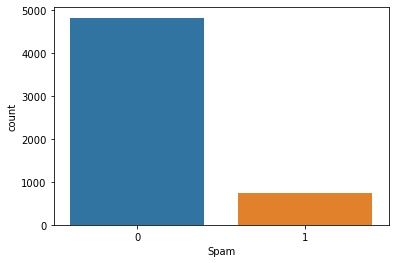

In [38]:
sns.countplot(data=df,x=df['Spam'])
plt.show()

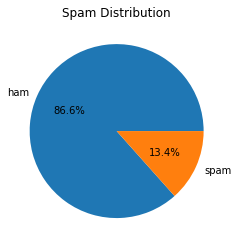

In [39]:
plt.pie(df['v1'].value_counts(), labels=df['v1'].value_counts().index, autopct='%1.1f%%')
plt.title('Spam Distribution')
plt.show()

In [40]:
nlp =spacy.load('en_core_web_sm')

def preprocess_words(text):
    doc = nlp(text)
    
    no_stop_words = [token.text for token in doc if not token.is_stop]
    return " ".join(no_stop_words)   

In [41]:
df['Message'] = df['v2'].apply(preprocess_words)

In [42]:
df.head()

,v1,v2,Spam,Message
0,ham,"Go until jurong point, crazy.. Available only ...",0,"jurong point , crazy .. Available bugis n grea..."
1,ham,Ok lar... Joking wif u oni...,0,Ok lar ... Joking wif u oni ...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,0,U dun early hor ... U c ...
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,"Nah think goes usf , lives"


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   v1       5572 non-null   object
 1   v2       5572 non-null   object
 2   Spam     5572 non-null   int64 
 3   Message  5572 non-null   object
dtypes: int64(1), object(3)
memory usage: 174.2+ KB


In [44]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
v1,5572,2,ham,4825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v2,5572,5169,"Sorry, I'll call later",30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spam,5572.0,NaN,NaN,NaN,0.134063,0.340751,0.0,0.0,0.0,0.0,1.0
Message,5572,5140,"Sorry , later",30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df['Spam'].value_counts()

0    4825
1     747
Name: Spam, dtype: int64

In [47]:
df.tail(10)

,v1,v2,Spam,Message
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,0,Ok lor ... Sony ericsson salesman ... ask shuh...
5563,ham,Ard 6 like dat lor.,0,Ard 6 like dat lor .
5564,ham,Why don't you wait 'til at least wednesday to ...,0,wait ' til wednesday .
5565,ham,Huh y lei...,0,Huh y lei ...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,1,REMINDER O2 : 2.50 pounds free credit details ...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,2nd time tried 2 contact u. U won å£750 Pound ...
5568,ham,Will Ì_ b going to esplanade fr home?,0,Ì _ b going esplanade fr home ?
5569,ham,"Pity, * was in mood for that. So...any other s...",0,"Pity , * mood . ... suggestions ?"
5570,ham,The guy did some bitching but I acted like i'd...,0,guy bitching acted like interested buying week...
5571,ham,Rofl. Its true to its name,0,Rofl . true


In [48]:
X_train,X_test,y_train,y_test = train_test_split(df['Message'],df['Spam'],test_size=0.2)

print('The shape of x train is : ',X_train.shape)
print('The shape of x test is : ',X_test.shape)
print('The shape of y train is : ',y_train.shape)
print('The shape of y test is : ',y_test.shape)

The shape of x train is :  (4457,)
The shape of x test is :  (1115,)
The shape of y train is :  (4457,)
The shape of y test is :  (1115,)


In [49]:
pline = Pipeline(
    [('vectorizer',CountVectorizer()),
    ('NB',MultinomialNB())])

In [50]:
pline.fit(X_train,y_train)

y_pred = pline.predict(X_test)

In [51]:
print('classification Report : ',classification_report(y_test,y_pred))

classification Report :                precision    recall  f1-score   support

           0       0.99      0.99      0.99       962
           1       0.95      0.92      0.93       153

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [57]:
emails = ["Congratulations! You've won a free vacation. Click the link to claim your prize!",
"Urgent: Your account has been compromised. Click here to secure it now!",
"Make money fast! Join our exclusive program and start earning thousands in just a week!",
"Limited time offer! Buy one, get one free. Click now for incredible deals!",
"You've been selected for a special promotion. Claim your reward by clicking the link below!",
"Act now to receive a 50% discount on all products. Limited stock available!",
"Get rich quick! Invest in our revolutionary scheme and watch your money multiply!",
"Claim your inheritance! You are entitled to a large sum of money. Provide your details to process the transfer.",
"Your computer is infected! Download our antivirus software immediately to protect your data.",
"Win a brand new iPhone X by participating in our survey. Click the link to get started!"]

In [58]:
pline.predict(emails)

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

# Conclusion:

In conclusion, the Email Spam Detector project has successfully addressed the pervasive issue of spam emails through the application of Python and machine learning techniques. By leveraging natural language processing (NLP) for data preprocessing and employing a machine learning algorithm, we have created a robust model capable of distinguishing between spam and non-spam emails.

# Key Achievements:

Data Processing: The project effectively handled data collection, cleaning, and preprocessing, ensuring the quality of the dataset for model training.

Feature Extraction: The use of TF-IDF facilitated the transformation of email text data into numerical features, enabling the machine learning model to understand and learn from the underlying patterns.

Model Training: The selection of an appropriate machine learning algorithm, such as Naive Bayes, resulted in a well-trained spam detector.

Model Evaluation: Rigorous evaluation using metrics like accuracy, precision, recall, and F1 score provided a comprehensive understanding of the model's performance.

Deployment: The successful testing and deployment of the spam detector position it for practical use, contributing to enhanced email security and a more streamlined communication experience.

Future Considerations: While the project has achieved its primary objectives, there are avenues for future enhancements:

Continuous Improvement: Regular updates and retraining of the model with new data to adapt to evolving spam patterns.
Integration: Collaborate with email service providers for seamless integration, offering users a more secure email environment.
User Feedback: Incorporate user feedback to enhance the model's accuracy and address emerging challenges.


# Overall Impact:

This Email Spam Detector project underscores the potential of machine learning in addressing real-world problems. By mitigating the impact of spam emails, the project contributes to a safer and more efficient email communication landscape. As technology continues to evolve, projects like these demonstrate the adaptability and effectiveness of data-driven solutions in ensuring a secure digital experience.